In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [39]:
childres = pd.read_csv("../ppl/childres_perp.csv")
db_recall = pd.read_csv("../ppl/recall_perp.csv")
ccc = pd.read_csv("../ppl/ccc_perp.csv")
ccc_dem = ccc.loc[ccc["label"] == 1]
ccc_con = ccc.loc[ccc["label"] == 0]
# get transcripts from younger kids
younger = ["5f", "5m", "6f", "6m", "7f", "7m"]#,
           #"8f", "8m", "9f", "9m",
           #"10f", "10m", "11f", "11m"]
childres_younger = childres.loc[childres["label"].isin(younger)]
print(childres["label"].unique())
print(childres.head())

['11m' '10m' '9f' '9m' '8f' '8m' '5f' '7f' '5m' '11f' '6m' '6f' '7m' '10f']
      file label    con_ppl  mmse     dem_ppl
0  55635co   11m  37.235615     0  254.840407
1  46636nj   11m  43.990384     0  321.714336
2  46794ca   11m  37.456791     0  296.756690
3  46757nj   11m  24.400426     0  215.462320
4  46910ca   11m  37.387011     0  301.241122


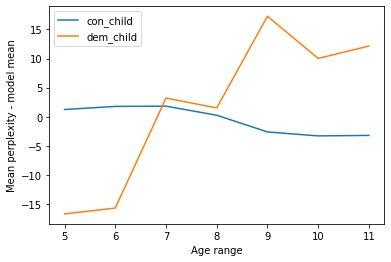

In [25]:
import matplotlib.pyplot as plt
mean_con = []
mean_dem = []

for i in range(5, 12):
    age = [str(i) + "f", str(i) + "m"]
    childres_temp = childres.loc[childres["label"].isin(age)]
    mean_con.append(np.mean(childres_temp["con_ppl"].values.tolist()))
    mean_dem.append(np.mean(childres_temp["dem_ppl"].values.tolist()))
mean_con_norm = [i - np.mean(childres["con_ppl"]) for i in mean_con]
mean_dem_norm = [i - np.mean(childres["dem_ppl"]) for i in mean_dem]

plt.plot(mean_con_norm, label="con_child")
plt.plot(mean_dem_norm, label="dem_child")
plt.legend()
plt.xlabel("Age range")
plt.ylabel("Mean perplexity - model mean")
plt.xticks(ticks=list(range(0, 7)), labels=[5, 6, 7, 8, 9, 10, 11])
plt.show()

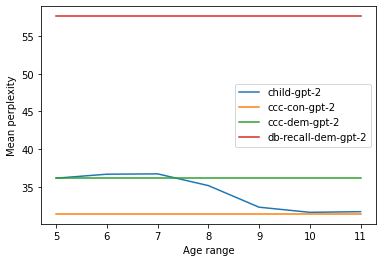

In [41]:
# plot gpt-2 together

ccc_con_gpt_2 = [np.mean(ccc_con["con_ppl"])]*7
ccc_dem_gpt_2 = [np.mean(ccc_dem["con_ppl"])]*7
recall_con_gpt_2 = [np.mean(db_recall["con_ppl"])]*7
plt.plot(mean_con, label="child-gpt-2")
plt.plot(ccc_con_gpt_2, label="ccc-con-gpt-2")
plt.plot(ccc_dem_gpt_2, label="ccc-dem-gpt-2")
plt.plot(recall_con_gpt_2, label="db-recall-dem-gpt-2")
plt.legend()
plt.xlabel("Age range")
plt.ylabel("Mean perplexity")
plt.xticks(ticks=list(range(0, 7)), labels=[5, 6, 7, 8, 9, 10, 11])
plt.show()


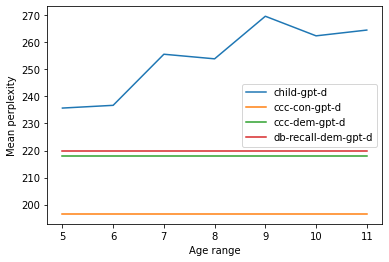

In [42]:
# plot gpt-d together
ccc_dem_gpt_d = [np.mean(ccc_dem["dem_ppl"])]*7
ccc_con_gpt_d = [np.mean(ccc_con["dem_ppl"])]*7
recall_dem_gpt_2 = [np.mean(db_recall["dem_ppl"])]*7
plt.plot(mean_dem, label="child-gpt-d")
plt.plot(ccc_con_gpt_d, label="ccc-con-gpt-d")
plt.plot(ccc_dem_gpt_d, label="ccc-dem-gpt-d")
plt.plot(recall_dem_gpt_2, label="db-recall-dem-gpt-d")
plt.legend()
plt.xlabel("Age range")
plt.ylabel("Mean perplexity")
plt.xticks(ticks=list(range(0, 7)), labels=[5, 6, 7, 8, 9, 10, 11])
plt.show()

In [33]:

db_recall.dropna()
print(db_recall.head())
print(stats.ttest_ind(childres["con_ppl"], db_recall["con_ppl"], equal_var=False)[1])
print(stats.ttest_ind(childres["dem_ppl"], db_recall["dem_ppl"], equal_var=False)[1])

     file   label     con_ppl  mmse     dem_ppl
0  610-0r  recall   43.697841     0  144.590976
1  057-0r  recall  351.448578     0  422.175508
2  181-2r  recall   66.766626     0  191.113357
3  257-2r  recall   11.579581     0   48.910868
4  154-0r  recall   22.869429     0  169.906645
1.0078764854962432e-09
0.004936613435089286


In [38]:
print(stats.describe(childres["dem_ppl"].values.tolist())[2])
print(stats.describe(db_recall["dem_ppl"].values.tolist())[2])

252.37596907126974
219.8580945839486


In [ ]:
stats.describe(childres_younger["dem_ppl"].values.tolist())
stats.describe(ccc_con["dem_ppl"].values.tolist())

In [ ]:
# Welch’s t-test, which does not assume equal population variance
stats.ttest_ind(childres_younger["dem_ppl"], ccc_dem["dem_ppl"], equal_var=False)